In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Normalization
import random as rnd

In [54]:
mnist=tf.keras.datasets.mnist

In [55]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [56]:
x_train_flattened=x_train.reshape((x_train.shape[0]),784)
x_test_flattened=x_test.reshape((x_test.shape[0]),784)

In [57]:
norm=Normalization(axis=-1)
norm.adapt(x_train_flattened)
x_train_norm=norm(x_train_flattened)
x_test_norm=norm(x_test_flattened)

In [58]:
model=Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')                    
])

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(x_train_norm,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2288 - accuracy: 0.9343
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0989 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0690 - accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0479 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0400 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0355 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [61]:
def findigit(lists):
    k=0
    a=np.zeros((lists.shape[0],),dtype=int)
    for list in lists:
        a[k]=np.argmax(list)
        k+=1
    return(a)

In [62]:
loss,accuracy=model.evaluate(x_test_norm,y_test)
print(accuracy)


313/313 [==============================] - 2s 4ms/step - loss: 781.8643 - accuracy: 0.9705
0.9704999923706055


1/1 [==============================] - 0s 175ms/step
[0]


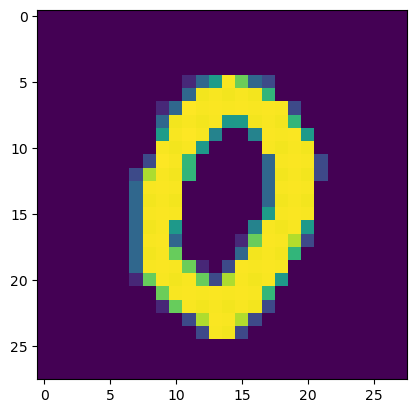

In [63]:
a=rnd.randint(0,9999)
plt.imshow(x_test[a])
x=np.array([x_test_norm[a]])
prediction=model.predict(x)
print(findigit(prediction))